# TensorFlow for Deep Learning


## Image Classification

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/competitions/digit-recognizer/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajesh22ed
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:01<00:00, 9.46MB/s]



Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
raw_data = pd.read_csv('/content/digit-recognizer/train.csv')

In [6]:
raw_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Image Preprocessing

In [37]:
labels = raw_data.iloc[:,0]

In [40]:
no_of_labels = labels.nunique()
print(f"Total number of labels -> {no_of_labels}")

Total number of labels -> 10


In [41]:
raw_data = np.array(raw_data.iloc[:,1:])

In [42]:
raw_data = raw_data.reshape(42000,28,28)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(raw_data,labels,test_size=0.2,random_state=42)

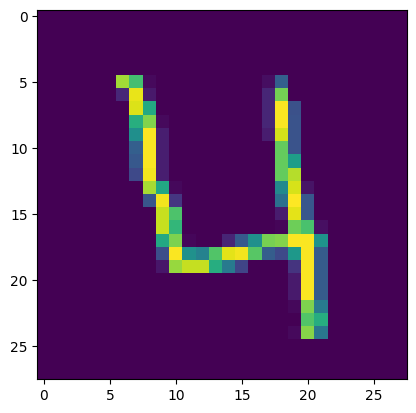

In [57]:
plt.imshow(raw_data[3]);

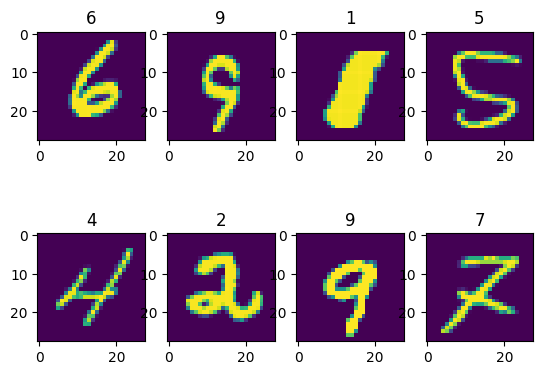

In [58]:
fig,axes = plt.subplots(2,4)
for i in range(2):
  for j in range(4):
    random_number = np.random.randint(1,1000)
    axes[i,j].imshow(raw_data[random_number])
    axes[i,j].set_title(f"{labels[random_number]}")

### Model Training

In [59]:
model = Sequential([
    Conv2D(128,4,input_shape=(28,28,1),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,4,activation='relu'),
    MaxPooling2D((2,2)),


    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [60]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
1050/1050 [==============================] - 13s 5ms/step - loss: 1.3008 - accuracy: 0.5918 - val_loss: 0.1579 - val_accuracy: 0.9550
Epoch 2/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1153 - accuracy: 0.9671 - val_loss: 0.0944 - val_accuracy: 0.9731
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0706 - accuracy: 0.9795 - val_loss: 0.0907 - val_accuracy: 0.9751
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0568 - accuracy: 0.9835 - val_loss: 0.0587 - val_accuracy: 0.9830
Epoch 5/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0929 - val_accuracy: 0.9767
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.0811 - val_accuracy: 0.9788
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0776 - val_accuracy

### Prediction on the Testset

In [84]:
def prediction(index):
  input = np.expand_dims(X_test[index],axis=0)
  pred = np.argmax(model.predict(input))
  output = np.array(Y_test)
  print()
  plt.imshow(X_test[index]);
  plt.title(f"Model Prediction ==> {pred}\n True Label ==> {output[index]}")

1/1 [==============================] - 0s 29ms/step



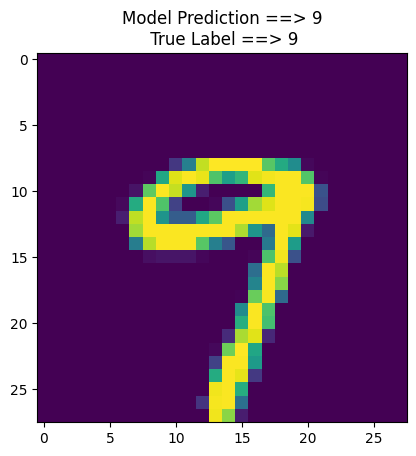

In [85]:
prediction(3)

1/1 [==============================] - 0s 54ms/step



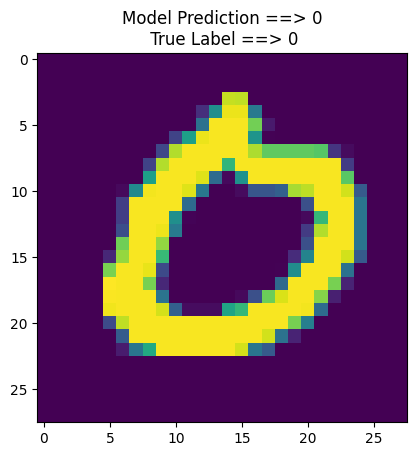

In [86]:
prediction(25)

1/1 [==============================] - 0s 22ms/step



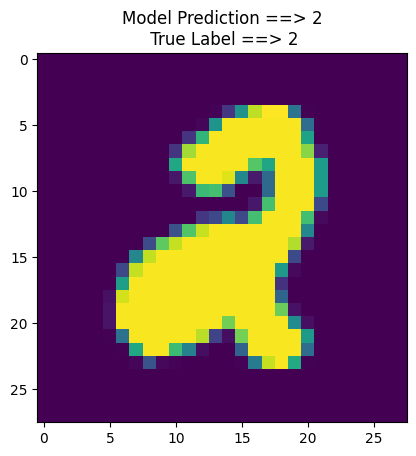

In [88]:
prediction(256)